# Serial Models in Data Science - Assignment 3

## Part III - Bayesian Filtering

### Submitted by: 


Tamar Entin - 210014411 <br/>
Guy Shafir - 315941799

### Table of Contents:


<a id="home"></a>


| Section| Topic |
| :- | :- |
| 1 |  [KALMAN FILTER WITH BIASED NOISE](#KALMAN_FILTER) | 
| 2 |  [EXTENDED KALMAN FILTER](#EXTENDED) | 
| 3 |  [GRID BASED FILTER](#GRID_FILTER) | 
| 4 |  [REJECTION SAMPLING AND MONTE CARLO INTEGRATION](#MONTE_CARLO) | 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import random, gauss

[Go to the beginning of the assignment](#home)
<a id="KALMAN_FILTER"></a><br/><br/>
<u> KALMAN FILTER WITH BIASED NOISE </u>


#### Derive the Kalman filter equations for the following linear-Gaussian filtering model with nonzero mean noises:
#### $$\cases{x_k =Ax_{k-1}+q_{k-1}\\y_k=Hx_k+r_k}$$ where $q_{k-1}\sim N\left(m_q;\, Q\right)$ and $r_k\sim N\left(m_r;\, R\right)$.

- It is recommended to use the two lemmas that were defined in task 2, section 3.



Consider the following linear-Gaussian filtering model with nonzero mean noises:

$$
\begin{cases} 
x_k = Ax_{k-1} + q_{k-1} \\ 
y_k = Hx_k + r_k 
\end{cases} \qquad 
\begin{cases} 
q_{k-1} \sim  N(m_q, Q) \\ 
r_k \sim N(m_r, R) 
\end{cases}
$$

Therefore, we have:

$$
\begin{cases} 
x_k \mid x_{k-1} \sim N(Ax_{k-1} + m_q, Q) \\ 
y_k \mid x_k \sim N(H x_k + m_r, R) 
\end{cases}
$$

The prediction and updating steps are performed by the following distributions:

$$
P(x_k \mid y_k) = N(x_k \mid m_k, p_k)
$$

$$
P(x_k\mid y_{k-1})=N(\bar m_k;\, \bar p_k)⇒\\ 
P(x_k\mid y_{k-1})=\int P(x_k\mid x_{k-1})P(x_{k-1}\mid y_{k-1})\, dx_{k-1}=N(Am_{k-1}+m_q;\, Ap_{k-1}A^T +Q)
$$

The prediction step is given by:

$$
\begin{cases} 
\bar m_k = A m_{k-1} + m_{q} \\ 
\bar p_k = A P_{k-1} A^T + Q 
\end{cases}
$$

For the update step, we can use **Lemma 1** to write the joint distribution of $(x_k, y_k)$ as:

$$
\begin{pmatrix} 
x_k \\ y_k 
\end{pmatrix} 
\sim 
N\left(
\begin{pmatrix} 
\bar m_k \\ 
H \bar m_k + m_r 
\end{pmatrix}; 
\begin{pmatrix} 
\bar p_k & \bar p_k H^T \\ 
H \bar p_k & H \bar p_k H^T + R 
\end{pmatrix}
\right)
$$

Now, we can use **Lemma 2** to find the conditional distribution $x_k \mid y_k$. To do this, we first need to identify $a, b, A, B$ and $C$ in the joint distribution:

$$
\begin{cases} 
a = \bar m_k \\ 
b = H \bar m_k + m_r \\ 
A = \bar p_k \\ 
B = H \bar p_k H^T + R \\ 
C = \bar p_k H^T 
\end{cases}
$$

Using these values, we can write the conditional distribution $x_k \mid y_k$ as:

$$
x_k \mid y_k 
\sim 
N\left(
\bar m_k + \bar p_k H^T\left(H\bar p_k H^T + R\right)^{-1}\left(y_k - H \bar m_k - m_r\right),
\bar p_k - \bar p_k H^T\left(H \bar p_k H^T + R\right)^{-1} H \bar p_k
\right) 
$$ 

By simplifying the above expression, we obtain the update equations:

$$
\begin{cases}
V_k = y_k-H\bar m_k - m_r\\
S_k=H\bar p_kH^T +R_k\\
K_k = \bar p_k H^T S_k^{-1}
\end{cases}\, ;
\qquad 
\begin{cases}
m_k = \bar m_k + K_k V_k\\
p_k = \bar p_k - K_k S_k K_k^T
\end{cases}
$$



[Go to the beginning of the assignment](#home)
<a id="EXTENDED"></a><br/><br/>
<u> EXTENDED KALMAN FILTER </u>


Consider the following non-linear space model:
$$\cases{x_k =x_{k-1}-0.01\sin\left(x_{k-1}\right)+q_{k-1}\\y_k=0.5\sin\left(2x_k\right)+r_k}$$ where $q_{k-1}\sim N\left(m_q;\, Q\right)$ and $r_k\sim N\left(m_r;\, R\right)$.

#### 1. Write the extended Kalman filter obtained by the **Taylor** linearisation.


$$
x_{k}=\underbrace{x_{k-1}-0.01 \sin \left(x_{k-1}\right)}_{f\left(x_{k-1}\right)
}+q_{k-1}  \\
y_{k} =\underbrace{0.5 \sin \left(2 x_{k}\right)}_{h\left(x_{k}\right)}+r_{k}
$$

When:

$$
q_{k-1} \sim \mathcal{N}(0, \underbrace{0.01^{2}}_{Q_{k-1}}) \text {    and    } r_{k} \sim N(0, \underbrace{0.02^2}_{R_{k}}) \\
$$

For the purpose of the prediction we will derive f(x):
$$f'(x)=F(x)=1-0.01cos(x)$$
For the purpose of the update we will derive h(x)
$$h'(x)=H(x)=cos(2x)$$

Prediction step:
$$\cases{m_k^-=f(m_{k-1})=m_{k-1}-0.01sin(m_{k-1})\\p_k^-=F(m_{k-1})p_{k-1}F(m_{k-1})^T+Q=(1-0.01cos(m_{k-1}))^2p_{k-1}+Q_{k-1}}$$
Update step:
$$\cases{V_k=y_k-h(m_k^-)=y_k-0.5sin(2m_k^-)\\S_k=H(m_k^-)p_k^-H(m_k^-)^T+R_k=cos^2(2m_k^-)p_k^-+R_k\\K_k=p_k^-H(m_k^-)^TS_k^{-1}=p_k^-cos(2m_k^-)S_k^{-1}}$$

$$m_k=m_k^-+K_kV_k\\P_k=P_k^--K_kS_kK_k^T$$


#### 2. Write the extended Kalman filter obtained by the **statistical** linearisation.

To derive the required expectations for the Extended Kalman filter (EKF), we need to calculate the following expressions:

1. $\mathbb{E}_{X \sim N(m, \sigma^2)}[e^{iax}]$:

    The calculation of the expectation of $e^{iax}$, where $X$ follows a normal distribution $N(m, \sigma^2)$, is:

    $$
    \begin{aligned}
    \mathbb{E}_{X \sim N(m, \sigma^2)}[e^{iax}] &= \int_{-\infty}^{\infty} e^{iax} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-m)^2}{2\sigma^2}} dx\\
    &\text{Let } \frac{x-m}{\sigma \sqrt{2}} = t \text{ , then } x = \sigma \sqrt{2} t + m\\
    &\text{We also have } \frac{dx}{\sigma \sqrt{2}} = dt \rightarrow dx = \sigma \sqrt{2} dt\\
    &\text{Hence, the integral becomes:}\\
    &=\frac{e^{iam}}{\sqrt{\pi}} \int_{-\infty}^{\infty} e^{\sqrt{2}\sigma ait} e^{-t^2} dt\\
    &= e^{iam} e^{-\frac{a^2\sigma^2}{2}}
    \end{aligned}
    $$


2. $\mathbb{E}_{X \sim N(m, \sigma^2)}[x e^{iax}]$:

    Similar to the above, we calculate the expectation:

    
$$\mathbb{E}_{X \sim \mathcal{N}\left(m, \sigma^{2}\right)}\left[x e^{i a x}\right]=\int_{-\infty}^{\infty} x e^{i a x} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-m)^{2}}{2 \sigma^{2}}} d x=\int_{-\infty}^{\infty} x \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2 \pi^{2}}\left(x-\left(m+i a \sigma^{2}\right)\right)^{2}} e^{i m a} e^{-\frac{1}{2} a^{2} \sigma^{2}} d x = \\=e^{-\frac{1}{2} a^{2} \sigma^{2}} e^{i m a} \int_{-\infty}^{\infty} x \cdot \mathcal{N}\left(m+i a \sigma^{2}, \sigma^{2}\right) d x=e^{-\frac{1}{2} a^{2} \sigma^{2}} e^{i m a} \mathbb{E}_{x \sim \mathcal{N}\left(m+i a \sigma^{2}, \sigma^{2}\right)}[x]=e^{-\frac{1}{2} a^{2} \sigma^{2}} e^{i m a}\left(m+i a \sigma^{2}\right)$$

<br/>
 
Having obtained these expectations, we can now proceed with the computations required for the EKF:

<br/>


- Prior mean $m_{k}^{-}$:

Using the nonlinear function and its first-order linear approximation:

\begin{align*}
m_{k}^{-} &= \mathbb{E}_{x_{k-1} \sim \mathcal{N}(m_{k-1}, P_{k-1})}[x_{k-1} - 0.01 \sin(x_{k-1})] \\
&= \mathbb{E}_{x_{k-1} \sim \mathcal{N}(m_{k-1}, P_{k-1})}[x_{k-1}] - 0.01 \mathbb{E}_{x_{k-1} \sim \mathcal{N}(m_{k-1}, P_{k-1})}[\sin(x_{k-1})] \\
&= m_{k-1} - 0.01 \operatorname{Im}\left(\mathbb{E}_{x_{k-1} \sim \mathcal{N}(m_{k-1}, P_{k-1})}[e^{i x_{k-1}}]\right) \\
&= m_{k-1} - 0.01 \sin(m_{k-1}) e^{-\frac{1}{2} P_{k-1}}
\end{align*}



- Prior covariance $P_{k}^{-}$:



\begin{align*}
& \mathbb{E}_{x_{k-1} \sim \mathcal{N}(m_{k-1}, P_{k-1})} \left[ (x_{k-1} - 0.01 \sin(x_{k-1})) (x_{k-1} - m_{k-1}) \right] \\
&= \mathbb{E}[x_{k-1}^2] - m_{k-1} \mathbb{E}[x_{k-1}] - 0.01 \mathbb{E}[x_{k-1} \sin(x_{k-1})] + 0.01 m_{k-1} \mathbb{E}[\sin(x_{k-1})] \\
&= \mathbb{E}[x_{k-1}^2] - \mathbb{E}[x_{k-1}]^2 - 0.01 \operatorname{Im}\left( \mathbb{E}[x_{k-1} e^{i x_{k-1}}] \right) + 0.01 m_{k-1} \operatorname{Im}\left( \mathbb{E}[e^{i x_{k-1}}] \right) \\
&= \operatorname{Var}(x_{k-1}) - 0.01 e^{-\frac{1}{2} P_{k-1}} \operatorname{Im}\left( e^{i m} (m + i P_{k-1}) \right) + 0.01 m_{k-1} e^{-\frac{1}{2} P_{k-1}} \operatorname{Im}\left( e^{i m} \right) \\
&= P_{k-1} - 0.01 e^{-\frac{1}{2} P_{k-1}} \left( m_{k-1} \sin(m_{k-1}) + P_{k-1} \cos(m_{k-1}) \right) + 0.01 m_{k-1} e^{-\frac{1}{2} P_{k-1}} \sin(m_{k-1}) \\
&= P_{k-1} \left(1 - 0.01 e^{-\frac{1}{2} P_{k-1}} \cos(m_{k-1}) \right)
\end{align*}

$$P_{k}^{-}=P_{k-1}\left(1-0.01 e^{-\frac{1}{2} P_{k-1}} \cos \left(m_{k-1}\right)\right)\left(P_{k-1}\right)^{-1} P_{k-1}\left(1-0.01 e^{-\frac{1}{2} P_{k-1}} \cos \left(m_{k-1}\right)\right)+Q_{k-1}=P_{k-1}\left(1-0.01 e^{-\frac{1}{2} P_{k-1}} \cos \left(m_{k-1}\right)\right)^{2}+Q_{k-1}$$


- Innovation $V_{k}$:

$$\left.\mathbb{E}_{x_{k} \sim N\left(m_{k}\right.}, P_{k}^{-}\right)\left[0.5 \sin \left(2 x_{k}\right)\right]=0.5 \operatorname{Im}\left(\mathbb{E}\left[e^{i 2 x_{k}}\right]\right)=0.5 \operatorname{Im}\left(e^{i 2 m_{k}^{-}} e^{-2 P_{k}^{-}}\right)=0.5 e^{-2 P_{k}^{-}} \sin \left(2 m_{k}^{-}\right)$$

$$V_{k}=y_{k}-0.5 e^{-2 P_{k}^{-}} \sin \left(2 m_{k}^{-}\right)$$

- Innovation covariance $S_{k}$:

\begin{align*}
& \mathbb{E}_{x_{k} \sim \mathcal{N}(m_{k}, P_{k}^{-})} \left[0.5 \sin(2 x_{k})(x_{k}-m_{k}^{-})\right] \\
&= 0.5 \mathbb{E}[x_{k} \sin(2 x_{k})] - 0.5 m_{k}^{-} \mathbb{E}[\sin(2 x_{k})] \\
&= 0.5 e^{-2 P_{k}^{-}} \operatorname{Im}\left(e^{i 2 m_{k}^{-}}(m_{k}^{-} + i 2 P_{k}^{-})\right) - 0.5 m_{k}^{-} e^{-2 P_{k}^{-}} \operatorname{Im}\left(e^{i 2 m_{k}^{-}}\right) \\
&= P_{k}^{-} e^{-2 P_{k}^{-}} \operatorname{Im}\left(i e^{i 2 m_{k}^{-}}\right) \\
&= P_{k}^{-} e^{-2 P_{k}^{-}} \cos(2 m_{k}^{-})
\end{align*}



$$
S_{k} = P_{k}^{-} e^{-2 P_{k}^{-}} \cos \left(2 m_{k}^{-}\right)\left(P_{k}^{-}\right)^{-1} P_{k}^{-} e^{-2 P_{k}^{-}} \cos \left(2 m_{k}^{-}\right)+R_k = P_{k}^{-} e^{-4 P_{k}^{-}} \cos \left(2 m_{k}^{-}\right)^{2}+R_k
$$


- Kalman gain $K_{k}$:


$$
K_{k} = P_{k}^{-} e^{-2 P_{k}^{-}} \cos (2 m_{k}^{-})(S_{k})^{-1}
$$

- Updated mean $m_{k}$:

$$
\begin{aligned}
m_{k} & = m_{k}^{-} + K_{k} V_{k}
\end{aligned}
$$

- Updated covariance $P_{k}$:

$$
\begin{aligned}
P_{k} & = P_{k}^{-} - K_{k} S_{k} K_{k}^{T}
\end{aligned}
$$

<br/> <br/>

This gives the complete implementation of the Extended Kalman Filter for a single step $k$, with statistical linearization.

<br/> 

The prediction step is given by: $P(x_k|y_{1:k-1})=\mathcal{N}(m_{k}^{-}, P_{k}^{-})$, where:

$\left\{\begin{array}{c}m_{k}^{-}=m_{k-1}-0.01 \sin \left(m_{k-1}\right) e^{-\frac{1}{2} P_{k-1}} \\ P_{k}^{-}=P_{k-1}\left(1-0.01 e^{-\frac{1}{2} P_{k-1}} \cos \left(m_{k-1}\right)\right)^{2}+Q_{k-1}\end{array}\right.$


<br/> 


The update step is given by: $P(x_k|y_{1:k})=\mathcal{N}(m_{k}, P_{k})$, where:

$\left\{\begin{array}{c}V_{k}=y_{k}-0.5\sin \left(2 m_{k}^{-}\right) e^{-2 P_{k}^{-}}  \\ S_{k}=P_{k}^{-} e^{-4 P_{k}^{-}} \cos \left(2 m_{k}^{-}\right)^{2}+R_k \\ K_{k}=P_{k}^{-} e^{-2 P_{k}^{-}} \cos \left(2 m_{k}^{-}\right)\left(S_{k}\right)^{-1} \\ m_{k}=m_{k}^{-}+K_{k} V_{k} \\ P_{k}=P_{k}^{-}-K_{k} S_{k} K_{k}^{T}\end{array}\right.$



#### 3. Implement in Python these versions of the EKF. Draw on the same graph in three different colors (with a clear caption) the trajectory of the system and the estimated states by the two different methods of EKF.

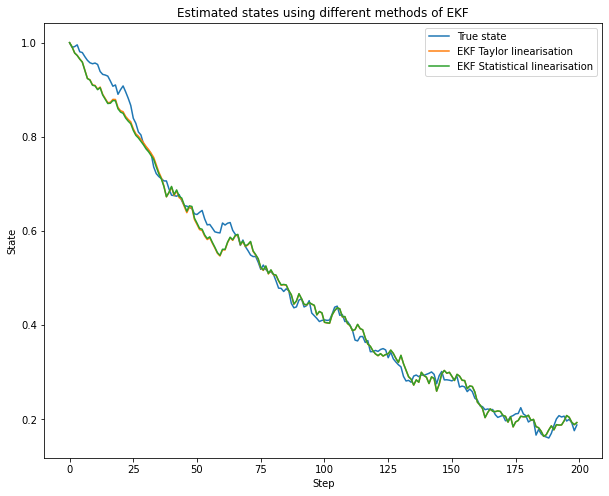

In [2]:
# Initialization
N = 200
Q = 0.01**2
R = 0.02**2
m_0 = 1
P_0 = 0.00001

# Process and observation models
f = lambda x: x - 0.01 * np.sin(x)
h = lambda x: 0.5 * np.sin(2*x)

# Initialization of state variables
m_taylor = np.zeros(N)
P_taylor = np.zeros(N)
m_stat = np.zeros(N)
P_stat = np.zeros(N)
m_taylor[0] = m_0
P_taylor[0] = P_0
m_stat[0] = m_0
P_stat[0] = P_0

# True state
X_true = np.zeros(N)
X_true[0] = m_0
for k in range(1, N):
    X_true[k] = f(X_true[k-1]) + np.sqrt(Q) * np.random.randn()

# Observations
Y = h(X_true) + np.sqrt(R) * np.random.randn(N)

# EKF
for k in range(1, N):
    # Prediction step
    m_minus_taylor = f(m_taylor[k-1])
    P_minus_taylor = (1 - 0.01 * np.cos(m_taylor[k-1]))**2 * P_taylor[k-1] + Q
    m_minus_stat = m_stat[k-1] - 0.01 * np.sin(m_stat[k-1]) * np.exp(-0.5 * P_stat[k-1])
    P_minus_stat = P_stat[k-1] * (1 - 0.01 * np.exp(-0.5 * P_stat[k-1]) * np.cos(m_stat[k-1]))**2 + Q

    # Update step
    V_taylor = Y[k] - h(m_minus_taylor)
    S_taylor = np.cos(2*m_minus_taylor)**2 * P_minus_taylor + R
    K_taylor = P_minus_taylor * np.cos(2*m_minus_taylor) / S_taylor
    m_taylor[k] = m_minus_taylor + K_taylor * V_taylor
    P_taylor[k] = P_minus_taylor - K_taylor * S_taylor * K_taylor

    V_stat = Y[k] - 0.5 * np.sin(2*m_minus_stat) * np.exp(-2*P_minus_stat)
    S_stat = P_minus_stat * np.exp(-4*P_minus_stat) * np.cos(2*m_minus_stat)**2 + R
    K_stat = P_minus_stat * np.exp(-2*P_minus_stat) * np.cos(2*m_minus_stat) / S_stat
    m_stat[k] = m_minus_stat + K_stat * V_stat
    P_stat[k] = P_minus_stat - K_stat * S_stat * K_stat


# Plot results
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0, N-1, N), X_true, label='True state')
plt.plot(np.linspace(0, N-1, N), m_taylor, label='EKF Taylor linearisation')
plt.plot(np.linspace(0, N-1, N), m_stat, label='EKF Statistical linearisation')
plt.title('Estimated states using different methods of EKF')
plt.xlabel('Step')
plt.ylabel('State')
plt.legend()
plt.show()


[Go to the beginning of the assignment](#home)
<a id="GRID_FILTER"></a><br/><br/>
<u> GRID BASED FILTER </u>

Consider a situation where the state space is discrete and finite: $\forall n;\,x_n\in S$ and $|S|=N<\infty$. Let $S=\{ x^1;\,\dots;\,x^N\}$.

Define the coefficients $w^i_{k-1\mid k+1}$ by the following relation: $$p\left(x_{k-1}\mid y_{1:k-1}\right)=\sum_{i=1}^Nw^1_{k-1\mid k+1}\delta\left(x_{k-1}-x^i\right)$$

The prediction step leads to the following expression: $$p\left(x_k\mid y_{1:k-1}\right)=\sum_{i=1}^Nw_{k\mid k-1}^i\delta\left(x_{k-1}-x^i\right)$$

Then the update step leads to: $$p\left(x_k\mid y_{1:k}\right)=\sum_{i=1}^Nw_{k\mid k}\delta\left(x_{k-1}-x^i\right)$$


#### Prove the following relations:



#### 1. $\forall i;\, w_{k\mid k-1}^i=\sum_{j=1}^Nw^j_{k-1\mid k-1}p\left(x^i\mid x^j\right)$, where $p\left(x^i\mid x^j\right)$ is the transition probability from state $x^j$ to state $x^i$.

For each $i$ we have: 

\begin{align*}
w_{k|k-1}^i &= p(x_k=x^i|y_{1:k-1}) \\
&= \sum_{x_{k-1}} p(x_k=x^i|x_{k-1})p(x_{k-1}|y_{1:k-1}) \\
&= \sum_{x_{k-1}} p(x_k=x^i|x_{k-1})\left[\sum_{j=1}^{N}w_{k-1|k-1}^j\delta(x_{k-1}-x_{k-1}^j)\right] \\
&= \sum_{j=1}^{N}w_{k-1|k-1}^j\sum_{x_{k-1}}p(x_k=x^i|x_{k-1})\delta(x_{k-1}-x_{k-1}^j) \\
&= \sum_{j=1}^{N}w_{k-1|k-1}^j p(x^i|x^j)
\end{align*}


#### 2. $\forall i;\, w^i_{k\mid k}=\frac{w^i_{k\mid k-1}p\left(y_k\mid x^i\right)}{\sum^N_{j=1}w_{k\mid k-1}^jp\left(y_k\mid x^j\right)}$, where $p\left(y_k\mid x^l\right)$ is the probability distribution of the measurement $y_k$ given the system is in state $x^l$.

For each $i$, we have:

\begin{equation}
w^i_{k\mid k}=\frac{w^i_{k\mid k-1}p\left(y_k\mid x^i\right)}{\sum^N_{j=1}w_{k\mid k-1}^jp\left(y_k\mid x^j\right)}
\end{equation}

where $p\left(y_k\mid x^l\right)$ is the probability distribution of the measurement $y_k$ given the system is in state $x^l$.

This equation shows how to update the weight for each state, $x^i$, using the predicted weight, $w^i_{k\mid k-1}$, and the likelihood of the measurement, $p\left(y_k\mid x^i\right)$.

The denominator, $\sum^N_{j=1}w_{k\mid k-1}^jp\left(y_k\mid x^j\right)$, is a normalization constant that ensures that the sum of the weights for all states equals 1.



#### 3. Consider the following situation. Let $x_k$ be a sequence of real numbers that satisfies: $$\cases{x_k=x_{k-1}+Lv_{k-1}\\y_k=\left(\frac 1 2 +r_k\right)x_k}$$ where $L$ is a positive real number, $v_{k-1}$ os a Rademacher random variable the distribution of which is given by: $$\mathbb{P}\left(v_{k-1}=i\right)=\cases{\frac 1 2 & If $i\in\{-1;\,1\}$\\0& Otherwise }$$ and $r_k$ is a uniform random variable in $\left[0;\, \frac 1 2\right]$. Let $x_0$ be a Gaussian random variable, such that $x_0\sim N\left(0;\, 1\right)$. 

#### Implement a grid based filter to track the state vector $x_k$ over 100 time steps, within the state space $S=\{x_0;\, x_0\pm L;\,\dots;\, x_0\pm nL\}$, where $N=100$. Take $L=2$. Draw a plot with the actual state and the estimated one with two different colors and an implicit legend, over the tracking interval.


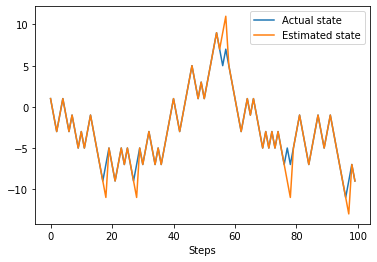

In [18]:
# Number of steps
num_of_steps = 100

# Initialize the steps
steps = np.arange(num_of_steps)

# Constants
length = 2
starting_value = 1

# Create a function for the phi equation
def calculate_phi(d, t, starting_value=starting_value, length=length):
    return starting_value + d * t * length

# Create reversed and forward step ranges, excluding the first value
reversed_step_range = reversed(range(1, num_of_steps))
forward_step_range = range(1, num_of_steps)

# Create the samples
samples = np.array(
    [calculate_phi(-1, t) for t in reversed_step_range]
    + [starting_value]
    + [calculate_phi(1, t) for t in forward_step_range]
)

# Initialize the state variables
num_samples = len(samples)
X = np.zeros(steps.shape)
Y = np.zeros(steps.shape)
R = np.zeros(steps.shape)
V = np.zeros(steps.shape)

# Initial conditions
X[0] = starting_value

# Initialize the weights
weights = np.zeros([num_of_steps, num_samples])
weights[0, :] = np.ones([1, num_samples]) / num_samples
predicted_weights = np.ones([1, num_samples]) / num_samples

# Loop over the steps to calculate the state and weights
for step in steps[1:]:
    # Randomly determine the velocity and R value
    V[step] = 1 + (np.random.rand() < 0.5) * -2
    R[step] = np.random.uniform(0, 0.5)
    
    # Calculate X and Y
    X[step] = length * V[step] + X[step - 1]
    Y[step] = (1 / 2 + R[step]) * X[step]

    # Calculate the predicted weights
    predicted_weights = np.array([
        np.sum(
            weights[step - 1, :] * (0.5 * (np.abs(samples[i] - samples) == length))
        )
        for i in range(num_samples)
    ])

    # Calculate the probabilities
    probabilities = np.array([
        1 / -0.5 * samples[j] * (samples[j] <= Y[step] <= 0.5 * samples[j])
        if Y[step] < 0
        else 1 / 0.5 * samples[j] * (0.5 * samples[j] <= Y[step] <= samples[j])
        for j in range(num_samples)
    ])

    # Update the weights
    weights[step, :] = predicted_weights * probabilities / np.sum(predicted_weights * probabilities)

# Determine the indices and state
indices = [np.searchsorted(samples, starting_value)] + [np.argmax(weights[i, :]) for i in steps[1:]]
state = samples[indices]

# Plot the actual and estimated state
plt.figure()
plt.plot(steps, X, label="Actual state")
plt.plot(steps, state, label="Estimated state")
plt.legend()
plt.xlabel("Steps")
plt.show()

[Go to the beginning of the assignment](#home)
<a id="MONTE_CARLO"></a><br/><br/>
<u> REJECTION SAMPLING AND MONTE CARLO INTEGRATION </u>

Consider a probability density distribution $f:\;\mathbb R\mapsto\mathbb R_+$. Let $g$ be another density distribution such that there exists $c>0$ such that $f(x)\leq c\cdot g(x)$ for all $x\in\mathbb R$. The purpose of rejection
sampling is to make use of $g$ , which is supposed  to be simple to sample in order to produce samplings from $f$ . 

The algorithm works as follows:
1. Draw a random variable $x$ following the distribution given by $g$.
2. Draw a random variable $u$ from the uniform distribution over $(0;\, 1)$.
3. if $u\leq\frac{f(x)}{c\cdot g(x)}$, accept $x$ as a sample from the distribution given by $f$. Otherwise, return to _1._.

To prove that this algorithm indeed generates a sample from $f$, we shall prove that the cumulative distribution function of $x$ given by: $$F_x(t)=\mathbb P\left(x\leq t\mid u\leq \frac{f(x)}{c\cdot g(x)}\right)$$ satisfies $F_x(t)=F(t)$, where $F$ is the cumulative distribution function of $f$. Answer the following questions, that will guide you.

#### 1. Prove that $\mathbb P\left(x\leq t\mid u\leq \frac{f(x)}{c\cdot g(x)}\right)=\frac{\mathbb P\left(x\leq t;\, u\leq\frac{f(x)}{c\cdot g(x)}\right)}{\mathbb P\left(u\leq\frac{f(x)}{c\cdot g(x)}\right)}$.

 We can use the following $P(A\mid B)=\frac{P(A\cap B)}{P(B)}$ formula: 
 
$$\mathbb P\left(x\leq t\mid u\leq\frac{f(x)}{c\cdot g(x)}\right)=\frac{\mathbb P\left(x\leq t;\, u\leq\frac{f(x)}{c\cdot g(x)}\right)}{\mathbb P\left(u\leq\frac{f(x)}{c\cdot g(x)}\right)}$$

#### 2. Prove that $\mathbb P\left(u\leq\frac{f(x)}{c\cdot g(x)}\right)=\frac 1 c$.

\begin{align*}
\mathbb{P}\left(u \leq \frac{f(x)}{c \cdot g(x)}\right) & = \mathbb{E}\left[ I\left(u\leq\frac{f(x)}{c\cdot g(x)}\right)\right] = \mathbb{E}_x\left[ \mathbb{E}_u\left[ I\left(u\leq\frac{f(x)}{c\cdot g(x)} | x \right) \right]\right]  = \mathbb{E}_x\left[ \mathbb{P} (u\leq\frac{f(x)}{c\cdot g(x)}| x ) \right] \\ 
&=\mathbb{E}_x\left[ \frac{f(x)}{c \cdot g(x)} \right]  = \int_{-\infty}^\infty \frac{f(x)}{c\cdot g(x)} g(x) \, dx  = \frac{1}{c} \int_{-\infty}^\infty f(x) \, dx  = \frac{1}{c}
\end{align*}


#### 3. Deduce that $F_x(t)=F(t)$.



$$
\begin{aligned}
F_{x}(t) &= \mathbb{P}(x \leq t \mid u \leq \frac{f(x)}{c g(x)}) 
= \frac{\mathbb{P}(x \leq t, u \leq \frac{f(x)}{c g(x)})}{\mathbb{P}(u \leq \frac{f(x)}{c g(x)})} 
= c \cdot \mathbb{P}(x \leq t, u \leq \frac{f(x)}{c g(x)}) 
= c \cdot \int_{-\infty}^{\infty} \mathbb{P}(x \leq t, u \leq \frac{f(x)}{c g(x)} \mid x) \cdot g(x) dx \\
&= c \int_{-\infty}^{t} \mathbb{P}(u \leq \frac{f(x)}{c g(x)} \mid x) \cdot g(x) dx = c \int_{-\infty}^{t} \frac{f(x)}{c g(x)} \cdot g(x) dx 
= \int_{-\infty}^{t} f(x) dx = F(t)
\end{aligned}
$$


Let $f(x)=0,2\frac 1 {\sqrt{2\pi}0,1}\exp\left(-\frac{\left(x-1\right)^2}{2\cdot0,01}\right)+0,8\frac 1 {\sqrt{2\pi}0,8}\exp\left(-\frac{\left(x-2\right)^2}{2\cdot0,64}\right)$ and $g(x)=\frac 1 {\sqrt{2\pi}10}\exp\left(-\frac{x^2}{2\cdot100}\right)$.  Find the smallest $c$ such that $f\leq cg$. Apply the rejection algorithm to compute $n=1000$ samples of $f$. Draw the graph of $f$ and the histogram of these samples on the same drawing. 

Use this algorithm to compute the following integral with the Monte-Carlo method: $$\int_{-\infty}^{+\infty}\left(x^2-3x+5\right)\cos\left(x\right)f(x)\,dx$$

In [4]:
N = 1000

def f(x):
    return 0.2/(np.sqrt(2*np.pi)*0.1)*np.exp(-(x-1)**2/(2*0.01)) + \
           0.8/(np.sqrt(2*np.pi)*0.8)*np.exp(-(x-2)**2/(2*0.64))

def g(x):
    return 1/(np.sqrt(2*np.pi)*10)*np.exp(- x**2/(2*100))

def h(x):
    return (x**2 - 3*x + 5) * np.cos(x)

def integrand(x):
    return h(x) * f(x)

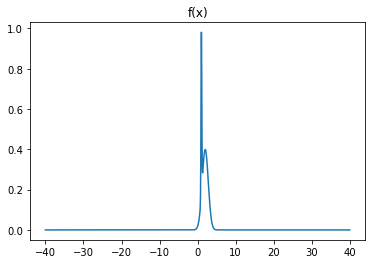

In [5]:
x = np.linspace(-40, 40, N)
y = f(x)
plt.title("f(x)")
plt.plot(x, y)

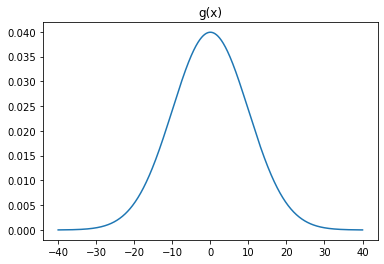

In [6]:
y = g(x)
plt.title("g(x)")
plt.plot(x, y)

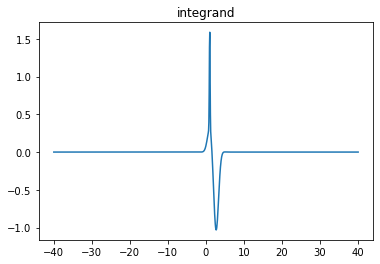

In [7]:
y = integrand(x)
plt.title("integrand")
plt.plot(x, y)

Let's evaluate the inequality: $$f(x)\leq c\cdot g(x)⇒\\⇒\frac{f(x)}{g(x)}\leq c$$
Therefore, we have to find $\max\frac{f(x)}{g(x)}$.

In [8]:
c = np.max(f(x) / g(x))
print(f'c: {c}')

c: 24.70797220109872


Rejection algorithm:

In [25]:
# Drawing variables
i = 0
x_valid = []

while i < N:
    x = np.random.normal(0, 10)
    u = np.random.random()
  # Consdering only valid variables
    if u <= (f(x)) / (c*g(x)): 
        x_valid.append(x)
        i += 1

x_valid = np.array(x_valid)
len(x_valid)

1000

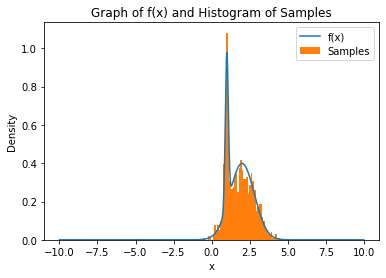

In [26]:
# Plot the graph of f(x)
x = np.linspace(-10, 10, N)
y = f(x)
plt.plot(x, y, label='f(x)')

# Plot the histogram of samples
plt.hist(x_valid, bins=50, density=True, label='Samples')
plt.legend()

plt.title('Graph of f(x) and Histogram of Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

Finally, evaluating the integral:

In [27]:
I = np.sum(h(x_valid)) / len(x_valid)
print(f'The value of the integral is approximately: {I:.10f}')

The value of the integral is approximately: -0.7903175201
